<a href="https://colab.research.google.com/github/sabill/MLCC-Project/blob/master/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coba data yg klasifikasi (joint 2019 dr kaggle)

In [0]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
# from tensorflow import feature_column
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
import io

In [41]:
uploaded = files.upload()
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

train_df.head()

Saving train.csv to train (14).csv


,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72,campur
1,2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56,campur
2,3,1.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109,campur
3,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54,campur
4,5,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,campur


Data Preprocessing

In [42]:
#prepocessing data
train_df.isnull().sum()

id                0
fac_1            63
fac_2            74
fac_3            62
fac_4            71
fac_5            72
fac_6            64
fac_7            78
fac_8            68
poi_1            67
poi_2            67
poi_3            86
size             68
price_monthly    85
room_count       70
total_call        0
gender            0
dtype: int64

In [43]:
for i in train_df.columns[1:9]:
  print(train_df[i].value_counts())

0.0    2385
1.0     845
Name: fac_1, dtype: int64
1.0    1958
0.0    1261
Name: fac_2, dtype: int64
0.0    1756
1.0    1475
Name: fac_3, dtype: int64
1.0    1812
0.0    1410
Name: fac_4, dtype: int64
1.0    2066
0.0    1155
Name: fac_5, dtype: int64
0.0    1848
1.0    1381
Name: fac_6, dtype: int64
0.0    3200
1.0      15
Name: fac_7, dtype: int64
1.0    1672
0.0    1553
Name: fac_8, dtype: int64


In [0]:
#fill null data (fac_1 until fac_8) with mode
for column in train_df.columns[1:9]:
  train_df[column] = train_df[column].fillna(train_df[column].mode()[0])

In [45]:
for i in train_df.columns[1:9]:
  print(train_df[i].value_counts())

0.0    2448
1.0     845
Name: fac_1, dtype: int64
1.0    2032
0.0    1261
Name: fac_2, dtype: int64
0.0    1818
1.0    1475
Name: fac_3, dtype: int64
1.0    1883
0.0    1410
Name: fac_4, dtype: int64
1.0    2138
0.0    1155
Name: fac_5, dtype: int64
0.0    1912
1.0    1381
Name: fac_6, dtype: int64
0.0    3278
1.0      15
Name: fac_7, dtype: int64
1.0    1740
0.0    1553
Name: fac_8, dtype: int64


In [46]:
train_df.isnull().sum()

id                0
fac_1             0
fac_2             0
fac_3             0
fac_4             0
fac_5             0
fac_6             0
fac_7             0
fac_8             0
poi_1            67
poi_2            67
poi_3            86
size             68
price_monthly    85
room_count       70
total_call        0
gender            0
dtype: int64

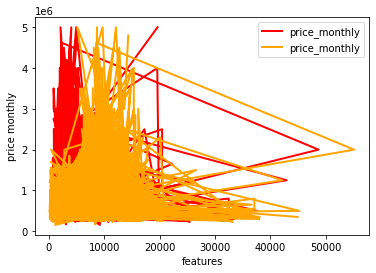

In [47]:
#Y = train_df['price_monthly']
plt.plot('poi_1', 'price_monthly', data = train_df, marker='', color='red', linewidth=2)
plt.plot('poi_2', 'price_monthly', data = train_df, marker='', color='orange', linewidth=2)

plt.xlabel('features')
plt.ylabel('price monthly')
plt.legend()

In [0]:
#fill null data based on ratio with price monthly
train_df['poi_1'] = train_df['poi_1'].fillna(train_df['poi_1'].mean())
train_df['poi_2'] = train_df['poi_2'].fillna(train_df['poi_2'].mean())
train_df['poi_3'] = train_df['poi_3'].fillna(train_df['poi_3'].mean())
train_df['size'] = train_df['size'].fillna(train_df['size'].mean())

In [49]:
train_df.head()

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72,campur
1,2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56,campur
2,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109,campur
3,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54,campur
4,5,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,campur


In [50]:
train_df.isnull().sum()

id                0
fac_1             0
fac_2             0
fac_3             0
fac_4             0
fac_5             0
fac_6             0
fac_7             0
fac_8             0
poi_1             0
poi_2             0
poi_3             0
size              0
price_monthly    85
room_count       70
total_call        0
gender            0
dtype: int64

In [0]:
# def proportion(atributs, labels):
#   atribut = 

In [0]:
train_df['room_count'] = train_df['room_count'].fillna(train_df['room_count'].mean())
train_df['price_monthly'] = train_df['price_monthly'].fillna(train_df['price_monthly'].mean())

In [52]:
train_df.head()

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72,campur
1,2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56,campur
2,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109,campur
3,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54,campur
4,5,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,campur


{'boxes': [<matplotlib.lines.Line2D at 0x7f92d3e11e80>],
 'caps': [<matplotlib.lines.Line2D at 0x7f92d3e1e8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92d3e2a390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f92d3e1efd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f92d3e1e1d0>,
  <matplotlib.lines.Line2D at 0x7f92d3e1e550>]}

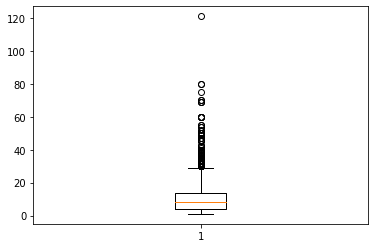

In [61]:
plt.boxplot(train_df['room_count'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f92d3d77a58>],
 'caps': [<matplotlib.lines.Line2D at 0x7f92d3d854a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92d3d85f28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f92d3d85ba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f92d3d77d68>,
  <matplotlib.lines.Line2D at 0x7f92d3d85128>]}

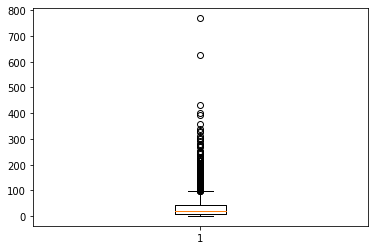

In [62]:
plt.boxplot(train_df['total_call'])

In [0]:
def detect_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    iqr = q3 - q1
    rub = q3 + 1.5*iqr
    rlb = q1 - 1.5*iqr

    outlier = (data[column] < rlb) | (data[column] > rub)
    
    return data[outlier]

In [66]:
detect_outlier(train_df, 'total_call')

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
2,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.0000,1600000.0,20.0,109,campur
30,31,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2908.0,9013.0,1958.0,21.0000,1700000.0,30.0,231,campur
42,43,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4539.0,13800.0,2973.0,12.0000,600000.0,50.0,392,putri
48,49,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1290.0,8770.0,2787.0,15.0000,800000.0,5.0,131,putri
79,80,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1997.0,8389.0,2585.0,21.0000,320000.0,9.0,190,putra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,3241,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4744.0,14569.0,3918.0,9.0000,350000.0,27.0,216,putri
3247,3248,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5335.0,13246.0,3089.0,12.0000,700000.0,8.0,140,putri
3273,3274,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5679.0,10593.0,3666.0,24.0000,1000000.0,6.0,130,campur
3278,3279,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1938.0,8110.0,3378.0,12.0000,500000.0,16.0,111,putri


In [0]:
gender_dict =  {
    'gender' : {
        'putra' : 0,
        'putri' : 1,
        'campur' : 2
    }
}

train_df.replace(gender_dict, inplace=True)

In [68]:
train_df['gender']

0       2
1       2
2       2
3       2
4       2
       ..
3288    1
3289    1
3290    2
3291    1
3292    0
Name: gender, Length: 3293, dtype: int64

In [69]:
train_df.describe(include='all')

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3.293000e+03,3293.000000,3293.000000,3293.000000
mean,1647.000000,0.256605,0.617067,0.447920,0.571819,0.649256,0.419374,0.004555,0.528394,4679.478921,9920.515189,4906.215778,12.143745,8.975029e+05,10.506050,35.362587,0.895536
std,950.751545,0.436826,0.486176,0.497356,0.494890,0.477275,0.493532,0.067348,0.499269,3532.630340,4666.575377,3569.844884,4.900271,6.416728e+05,9.462942,47.269615,0.681304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519.000000,168.000000,324.000000,6.000000,1.550000e+05,1.000000,1.000000,0.000000
25%,824.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2401.000000,7918.000000,2727.000000,9.000000,5.000000e+05,4.000000,8.000000,0.000000
50%,1647.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4011.000000,9326.000000,3995.000000,12.000000,6.670000e+05,8.000000,20.000000,1.000000
75%,2470.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5850.000000,12354.000000,5957.000000,12.143745,1.100000e+06,14.000000,44.000000,1.000000
max,3293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48675.000000,55105.000000,46517.000000,48.000000,5.000000e+06,121.000000,769.000000,2.000000


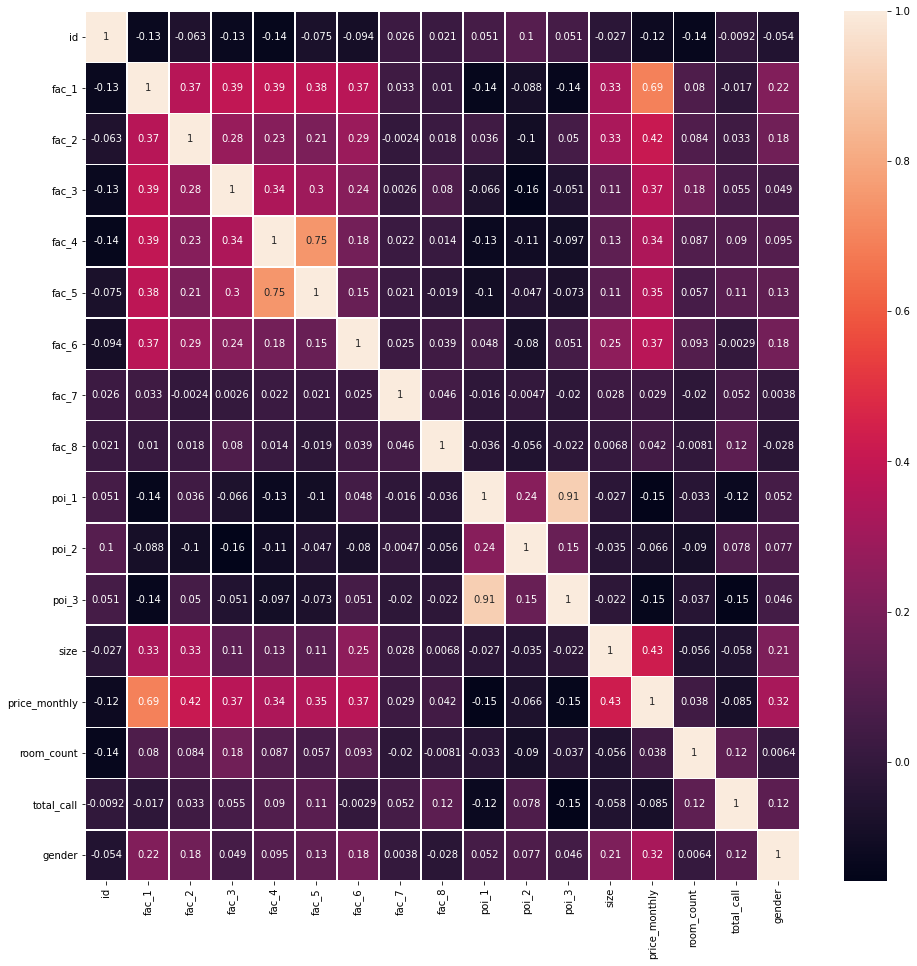

In [70]:
plt.figure(figsize = (16,16))
ax = sns.heatmap(train_df.corr(), annot=True, linewidths=.5)

In [0]:
x = train_df.loc[:,'fac_1':'fac_8']
y = train_df.loc[:,'gender':]

In [0]:
features = train_df.loc[:,'poi_1':'total_call']
label = train_df.loc[:,'gender':]
# train_label

In [0]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(train_features)
# X

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [0]:
# from keras import Sequential
# from keras.layers import Dense

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=7))
classifier.add(Dropout(0.2))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.2))
#Third  Hidden Layer
# classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal'))
# classifier.add(Dropout(0.2))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [96]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 4)                 32        
_________________________________________________________________
dropout_14 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_15 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])

In [99]:
classifier.fit(X_train,y_train, batch_size=10, epochs=20)

Epoch 1/20
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2904
Epoch 2/20
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2904
Epoch 3/20
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2904
Epoch 4/20
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2904
Epoch 5/20
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2904
Epoch 6/20
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2904
Epoch 7/20
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2904
Epoch 8/20
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2904
Epoch 9/20
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2904
Epoch 10/20
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2904
Epoch 11/20
264/264 [========

In [100]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

83/83 [==============================] - 0s 967us/step - loss: nan - accuracy: 0.2904


[nan, 0.29043281078338623]

In [0]:
# y_pred=classifier.predict(X_test)

In [0]:
# input_layer = Input(shape=(train_features.shape[1],))
# dense_layer_1 = Dense(15, activation='relu')(input_layer)
# dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
# output = Dense(train_label.shape[1], activation='softmax')(dense_layer_2)

# model = Model(inputs=input_layer, outputs=output)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])



In [0]:
# train_label.shape

In [0]:
# model.summary()

In [0]:
# history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.3)

In [0]:
# score = model.evaluate(X_test, y_test, verbose=1)

# print("Test Score:", score[0])
# print("Test Accuracy:", score[1])

In [0]:
# score